In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
(X_train, y_train),(X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

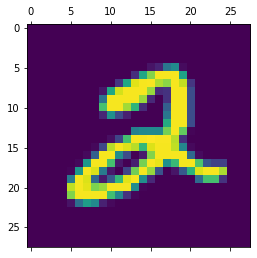

In [5]:
plt.matshow(X_train[5])

In [6]:
y_train[5]

2

In [16]:
X_train = X_train/255
X_test = X_test/255

In [17]:
X_train.shape

(60000, 28, 28)

In [19]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2721 - accuracy: 0.9230
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1219 - accuracy: 0.9641
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0845 - accuracy: 0.9747
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0645 - accuracy: 0.9807
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0502 - accuracy: 0.9843
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0412 - accuracy: 0.9875
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0323 - accuracy: 0.9896
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0269 - accuracy: 0.9918
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0222 - accuracy: 0.9935
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.018

In [20]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0769 - accuracy: 0.9790


[0.0769205167889595, 0.9789999723434448]

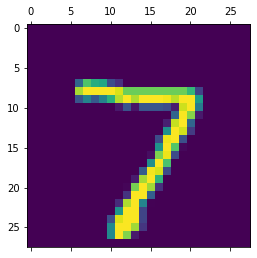

In [21]:
plt.matshow(X_test[0])

In [22]:
y_predicted = model.predict(X_test)
np.argmax(y_predicted[0])

7

In [23]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [24]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [25]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 970,    0,    1,    0,    1,    3,    2,    1,    1,    1],
       [   0, 1128,    2,    1,    0,    1,    1,    0,    2,    0],
       [   6,    3, 1002,    2,    3,    0,    1,    4,    9,    2],
       [   0,    0,    5,  991,    0,    4,    0,    2,    3,    5],
       [   2,    0,    1,    0,  961,    0,    1,    1,    2,   14],
       [   2,    0,    0,   11,    0,  871,    2,    1,    2,    3],
       [   4,    3,    2,    1,    6,    3,  937,    0,    2,    0],
       [   1,    8,   10,    1,    1,    0,    0,  996,    3,    8],
       [   0,    1,    2,    7,    4,    4,    2,    3,  944,    7],
       [   1,    2,    0,    2,    9,    1,    0,    4,    0,  990]])>

Text(69.0, 0.5, 'Truth')

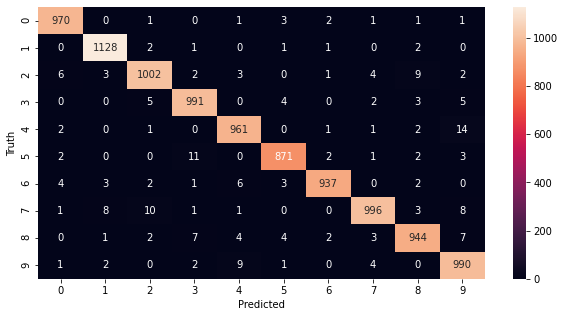

In [26]:
import seaborn as sn
plt.figure(figsize = (10,5))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')